<a href="https://colab.research.google.com/github/sisifo3/P_T_2/blob/main/OCR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! sudo apt install tesseract-ocr
! pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,624 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot from 2021-09-15 23-15-45.png to Screenshot from 2021-09-15 23-15-45.png


In [ ]:
image_path_in_colab = '/content/Screenshot from 2021-09-13 10-12-21.png'

extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

In [ ]:
print(pytesseract.image_to_boxes(Image.open(image_path_in_colab)))

~ 0 26 673 413 0
~ 8 0 670 2 0



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot from 2021-09-15 12-22-42.png to Screenshot from 2021-09-15 12-22-42.png


In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/Screenshot from 2021-09-15 23-02-10.png')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [ ]:
image = cv2.imread('/content/Screenshot from 2021-09-15 23-02-10.png')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

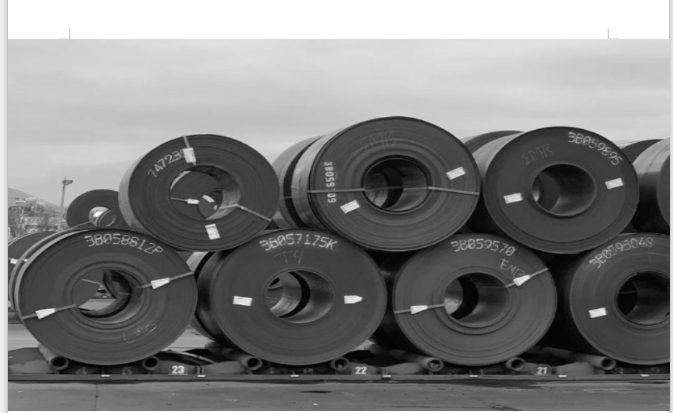

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(gray)



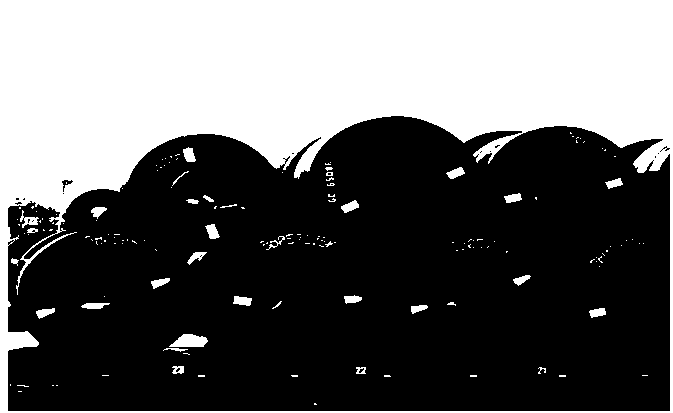

In [ ]:
cv2_imshow(thresh)


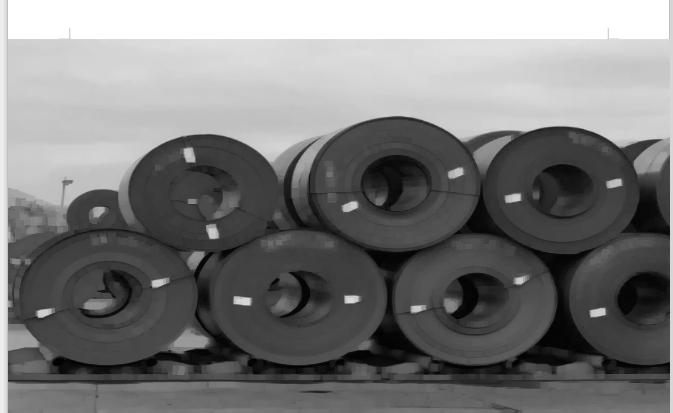

In [ ]:
cv2_imshow(opening)

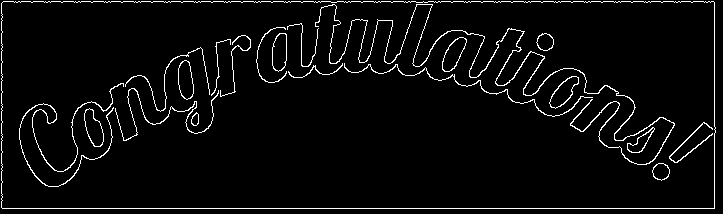

In [ ]:
cv2_imshow(canny)

In [ ]:
! pip install --user pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=5e109cf5c611ca5efe5dea6734a7fb49f7dad671efd9f298702f4952f53f5a50
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
! pip install --user tesseract

     |████████████████████████████████| 45.6 MB 50 kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562569 sha256=78a3adb0cd948dc05c50e0b69b03eb8f82b7f177a7d54781aa08c60651d7cdd6
  Stored in directory: /root/.cache/pip/wheels/01/3f/af/2f732560b9c4e51dd131bcbc6b7466a3124d15ab3fd393f85a
Successfully built tesseract


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,503 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

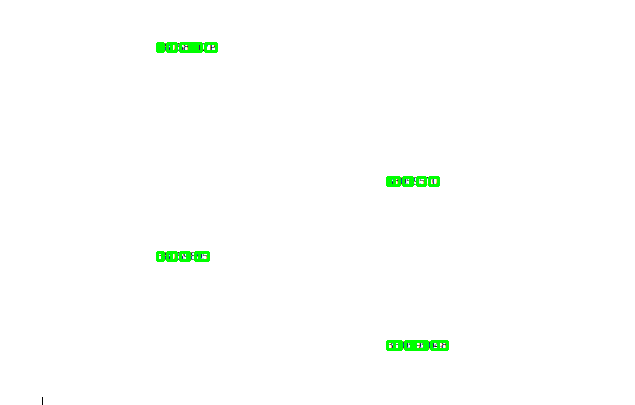

-1

In [ ]:
import cv2
import pytesseract
from pytesseract import image_to_boxes
from google.colab.patches import cv2_imshow

#import tesseract


img = cv2.imread('/content/Screenshot from 2021-09-15 22-42-44.png')
#img = canny

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 

for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)


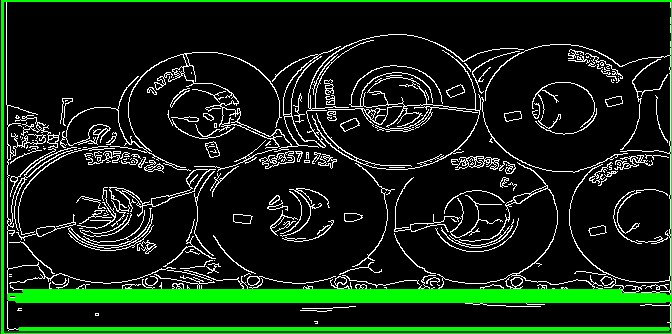

-1

In [ ]:
import cv2
import pytesseract
from pytesseract import image_to_boxes
from google.colab.patches import cv2_imshow

#import tesseract


img = cv2.imread('/content/Screenshot from 2021-09-15 12-22-42.png')
#img = canny

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 

for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

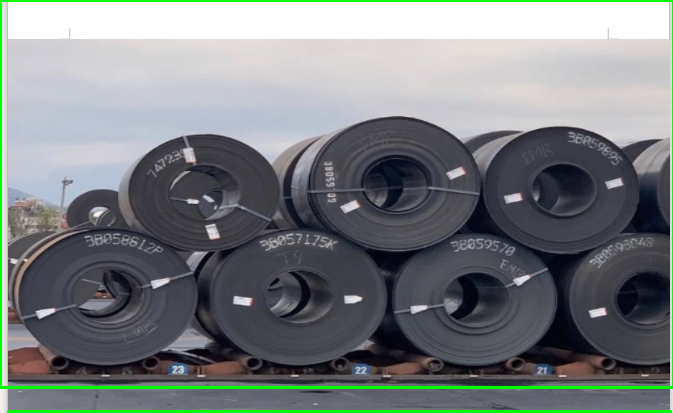

-1

In [ ]:
import cv2
import pytesseract
from pytesseract import image_to_boxes
from google.colab.patches import cv2_imshow

#import tesseract


img = cv2.imread('/content/Screenshot from 2021-09-13 10-12-21.png')
#img = canny

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 

for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

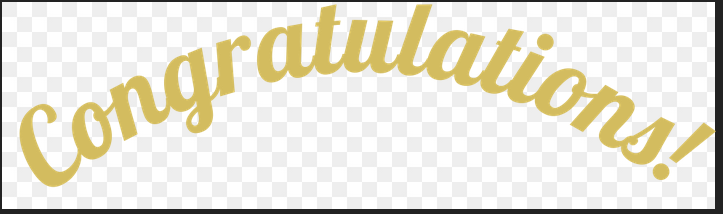

-1

In [ ]:
import cv2
import pytesseract
from pytesseract import image_to_boxes
from google.colab.patches import cv2_imshow

#import tesseract


img = cv2.imread('/content/Screenshot from 2021-09-15 23-02-10.png')
#canny = canny(img)
#img = canny

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 

for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)
#Screenshot from 2021-09-15 23-02-10.png

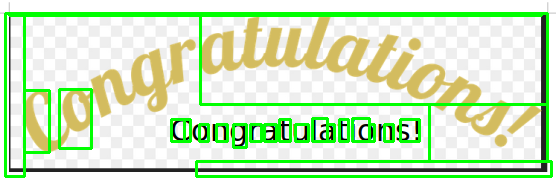

-1

In [ ]:
import cv2
import pytesseract
from pytesseract import image_to_boxes
from google.colab.patches import cv2_imshow

#import tesseract


img = cv2.imread('/content/Screenshot from 2021-09-15 23-05-28.png')
#img = canny

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 

for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)


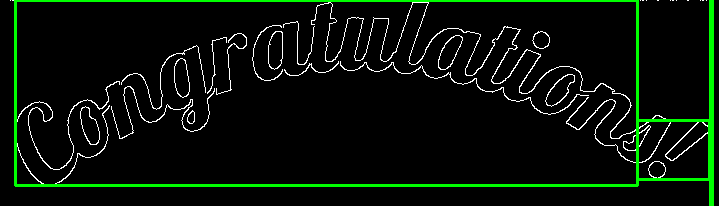

-1

In [ ]:
#Screenshot from 2021-09-15 23-15-45.png

import cv2
import pytesseract
from pytesseract import image_to_boxes
from google.colab.patches import cv2_imshow

#import tesseract


img = cv2.imread('/content/Screenshot from 2021-09-15 23-15-45.png')
#img = canny

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 

for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)


In [ ]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/Screenshot from 2021-09-15 22-42-44.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


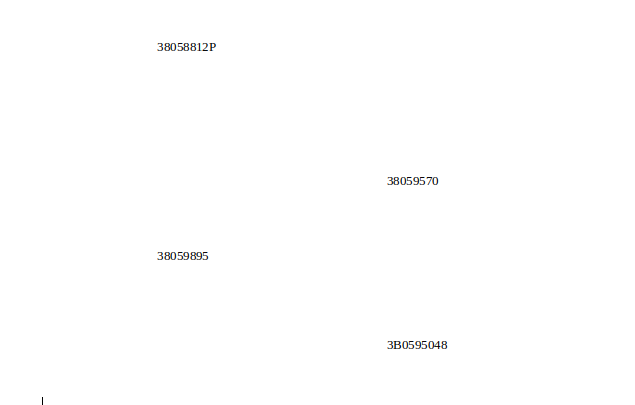

-1

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

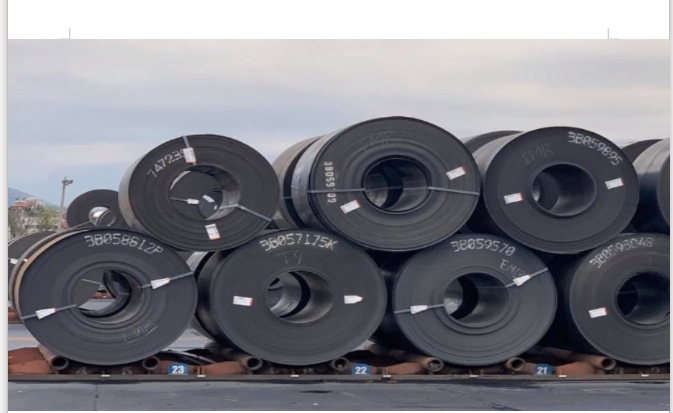

-1

In [ ]:
import re
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/Screenshot from 2021-09-13 10-12-21.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
import re
osd = pytesseract.image_to_osd(img)
angle = re.search('(?<=Rotate: )\d+', osd).group(0)
script = re.search('(?<=Script: )\d+', osd).group(0)
print("angle: ", angle)
print("script: ", script)